![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

11356
141.7779364512674
  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


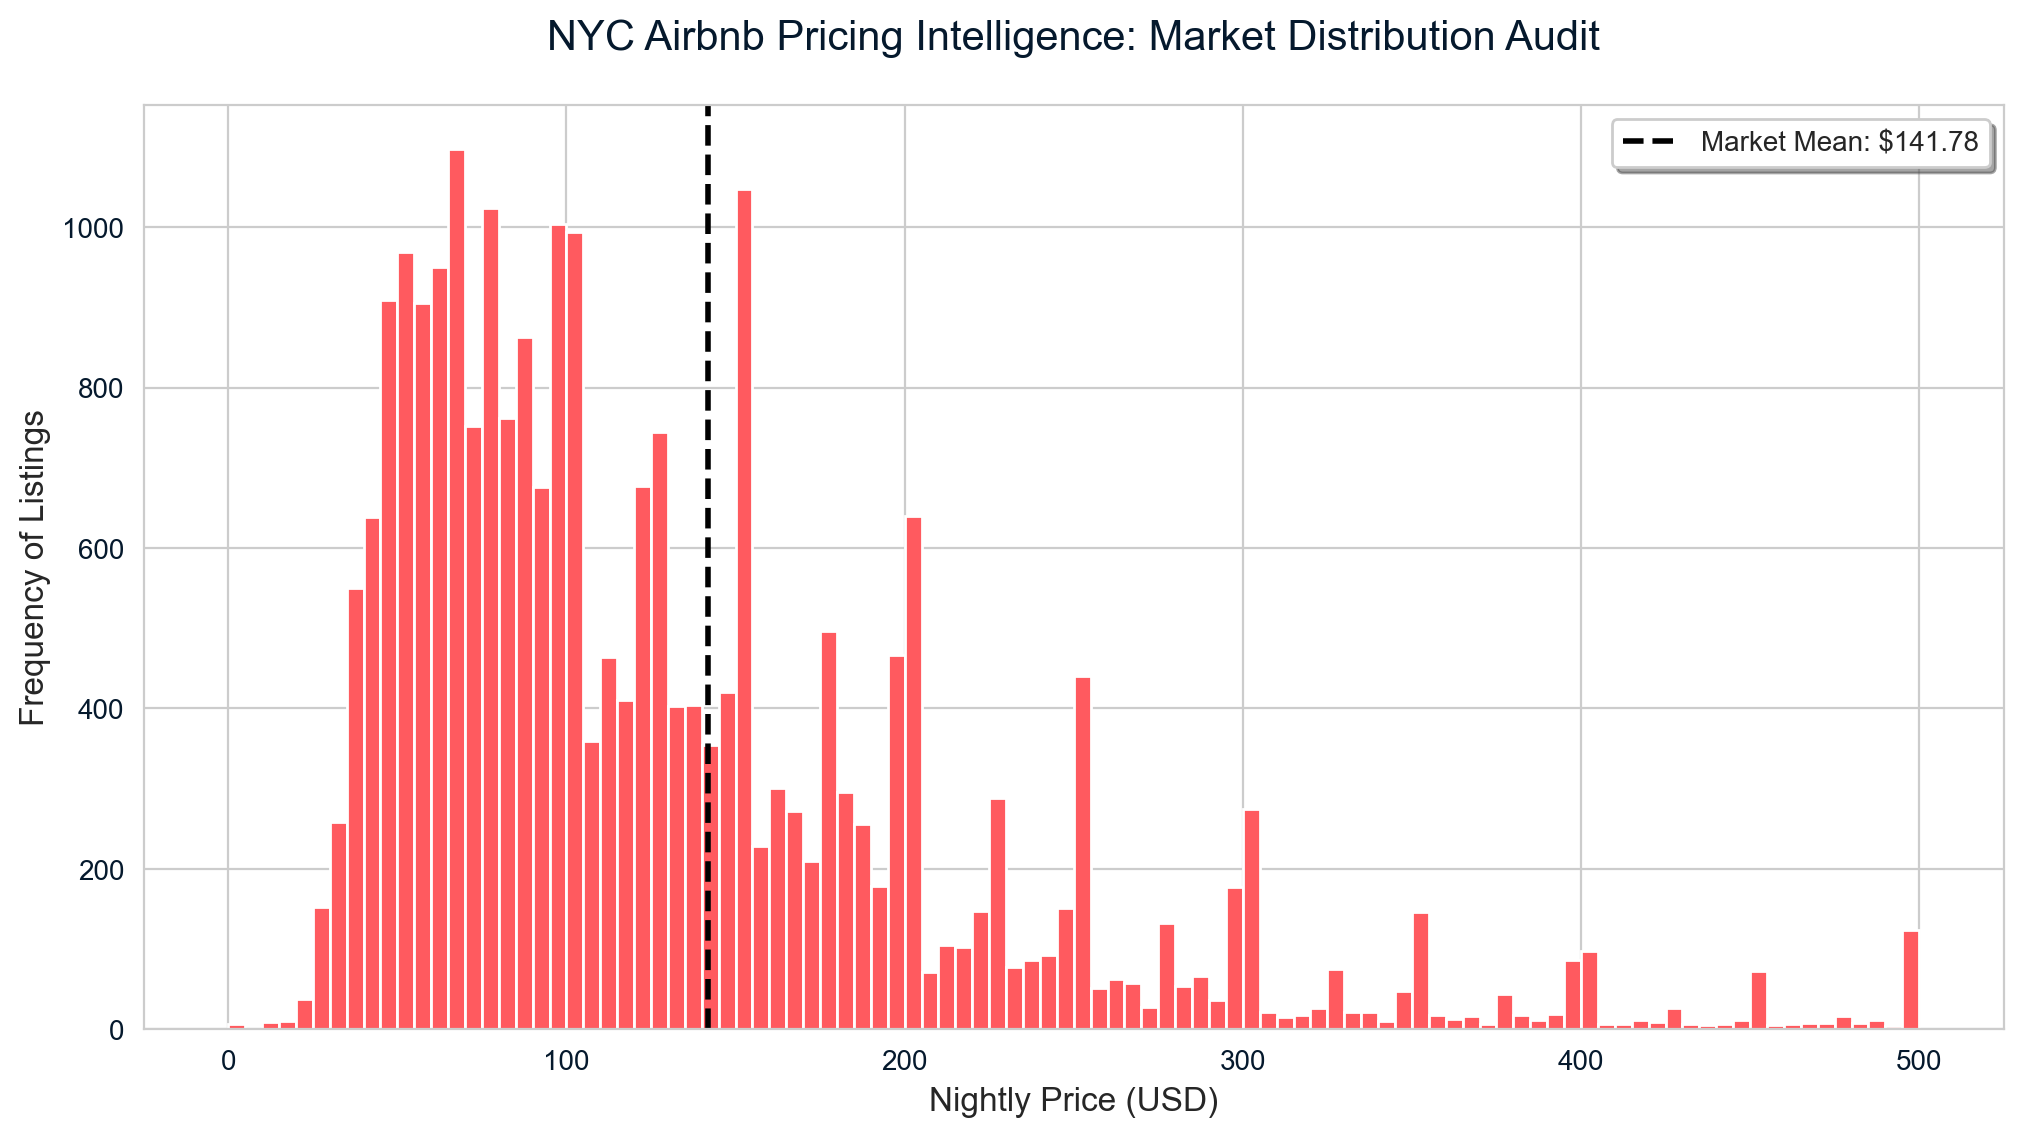

In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Import data
airbnb_price = pd.read_csv("data/airbnb_price.csv")
airbnb_room_type = pd.read_excel("data/airbnb_room_type.xlsx")
airbnb_last_review = pd.read_csv("data/airbnb_last_review.tsv", sep='\t')


# Look at the imported data
airbnb_price.head()
airbnb_room_type.head()
airbnb_last_review.head()

#merge two dataframe into one
airbnb_price_room_type = airbnb_price.merge(airbnb_room_type, on= "listing_id")
airbnb_price_room_type.head()

#merge the new dataframe with the review data
airbnb_price_room_review = airbnb_price_room_type.merge(airbnb_last_review, on = "listing_id")
airbnb_price_room_review.head()

#Convert the review data yo a date format
airbnb_price_room_review["last_review"] = pd.to_datetime(airbnb_price_room_review["last_review"], errors="coerce")
airbnb_price_room_review.head()

#Find the earliest and most recent dates
first_reviewed = airbnb_price_room_review["last_review"].min()
last_reviewed = airbnb_price_room_review["last_review"].max()

#Clean the room_type data with pandas
airbnb_price_room_review["room_type"] = airbnb_price_room_review["room_type"].str.lower()

#Examine the unique values in room type
airbnb_price_room_review["room_type"].unique()

#Filter the data to only private rooms
private_rooms = airbnb_price_room_review[airbnb_price_room_review["room_type"]== "private room"]

#count the value of private rooms in room type
private_room_counts = private_rooms.shape[0]
print(private_room_counts)

#converting the price data to float values
airbnb_price_room_review["price"] = airbnb_price_room_review["price"].str.replace("dollars", "", regex=False).astype(float)
airbnb_price_room_review["price"].dtypes

#find the mean of the price
mean_price = airbnb_price_room_review["price"].mean()
print(mean_price)

#Loading the solution data into a dataFrame
review_dates = pd.DataFrame(
    {
        "first_reviewed": first_reviewed, 
     "last_reviewed": last_reviewed, 
     "nb_private_rooms": private_room_counts , 
     "avg_price": mean_price
     },
    index=[0])

#round the price to two decimal place
review_dates["avg_price"] = review_dates["avg_price"].round(2)
print(review_dates)


#Create 'images' folder
if not os.path.exists('images'):
    os.makedirs('images')

#Set the Visual Aesthetic (AirBnb uses a specific red: #FF5A5F)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Generate the Distribution Plot
plt.hist(airbnb_price_room_review['price'], bins=100, range=(0, 500), color='#FF5A5F', edgecolor='white')

#Add the 'Senior Insight' line (The Mean)
plt.axvline(mean_price, color='black', linestyle='--', linewidth=2, label=f'Market Mean: ${mean_price:.2f}')

#Add the professional Labeling
plt.title('NYC Airbnb Pricing Intelligence: Market Distribution Audit', fontsize=15, pad=20)
plt.xlabel('Nightly Price (USD)', fontsize=12)
plt.ylabel('Frequency of Listings', fontsize=12)
plt.legend(frameon=True, shadow=True)

# save with High Resolution
plt.savefig("images/market_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
